In [ ]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from copy import deepcopy
import matplotlib.pyplot as plt


In [ ]:
# using a net with dims of n0, n1, reurn the contribuition of each layer
def calc_loss(n0,n1):
  # creating input vector and initial weights
  mu_x=0
  sigma_x= 1
  x_vec = torch.randn(n0)
  z = torch.tensor(1.)

  # setting up the network
  class Net(nn.Module):

    def __init__(self, n0, n1):
        super().__init__()
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(n0, n1, bias=False)
        self.fc1.weight.data.normal_(0, 1/n0)
        self.fc2 = nn.Linear(n1, 1, bias=False)
        self.fc2.weight.data.normal_(0, 1/n1)


    def forward(self, x):
        x = self.fc1(x)
        z_hat = self.fc2(x)
        return z_hat
  #define the net
  net = Net(n0, n1)
  w1_init = net.fc1.weight.clone()
  w2_init = net.fc2.weight.clone()
  loss_f = nn.MSELoss()
  optimizer = optim.Adam(net.parameters(), lr = 0.001)
  # training the net
  steps = 20

  for i in range(steps):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    # net = net.float()
    z_hat = net(x_vec)#.float())
    # loss = loss_f(z_hat.float(), z.float())
    loss = loss_f(z_hat, z)
    loss.backward()
    optimizer.step()
  # w1- init w2-final
  with torch.no_grad():
    w1_final=net.fc1.weight.clone()
    w2_final=net.fc2.weight.clone()

    net.fc1.weight[:] = w1_init
    z_hat_1 = net(x_vec.float())
    loss_1 = loss_f(z_hat_1.float(), z.float())

  # w1- final w2-init
  with torch.no_grad():
    net.fc1.weight[:] = w1_final
    net.fc2.weight[:]=w2_init
    z_hat_2 = net(x_vec.float())
    loss_2 = loss_f(z_hat_2.float(), z.float())


  return loss_1 , loss_2


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


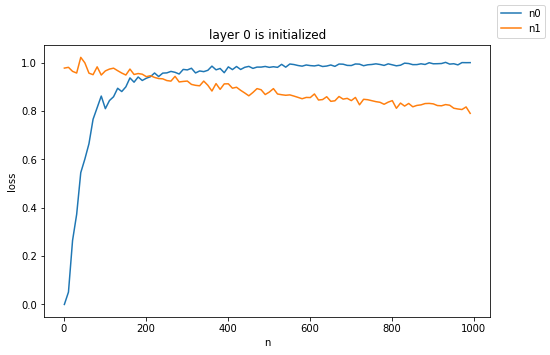

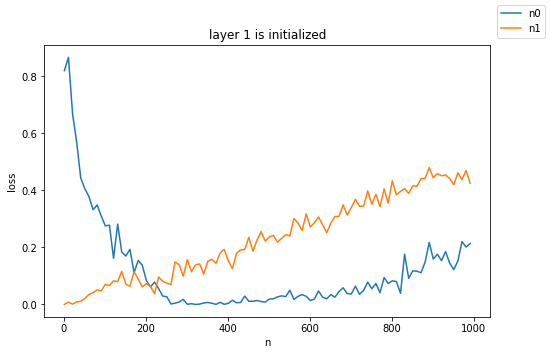

In [ ]:
loss_w0i_n0_run=[]
loss_w1i_n0_run=[]
loss_w0i_n1_run=[]
loss_w1i_n1_run=[]


#n0 run
for  n0 in range(1, 1000, 10):
  loss=calc_loss(n0,200)
  loss_w0i_n0_run.append(loss[0])
  loss_w1i_n0_run.append(loss[1])

#n1 run
for  n1 in range(1, 1000, 10):
  loss=calc_loss(200,n1)
  loss_w0i_n1_run.append(loss[0])
  loss_w1i_n1_run.append(loss[1])

#plotting results
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
x_vec=np.arange(1,1000,10)
plt.plot(x_vec,loss_w0i_n0_run,label="n0")
plt.plot(x_vec,loss_w0i_n1_run,label="n1")
#plt.plot(x_vec,losses_n1)
plt.ylabel('loss')
plt.xlabel('n')
plt.title("layer 0 is initialized")
fig.legend()



fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
x_vec=np.arange(1,1000,10)
plt.plot(x_vec,loss_w1i_n0_run,label="n0")
plt.plot(x_vec,loss_w1i_n1_run,label="n1")
#plt.plot(x_vec,losses_n1)
plt.ylabel('loss')
plt.xlabel('n')
plt.title("layer 1 is initialized")
fig.legend()






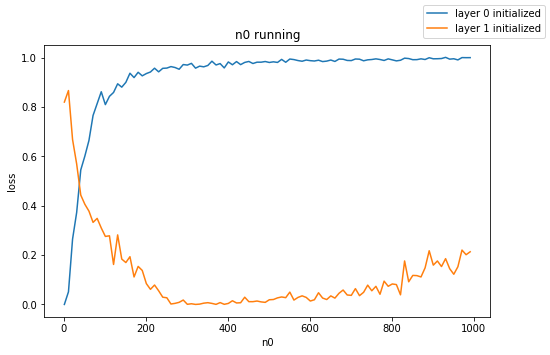

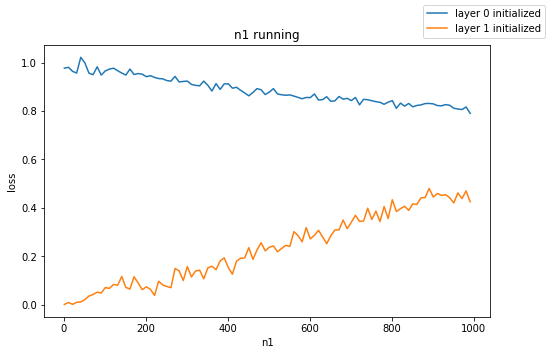

In [ ]:
#plotting results
fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
x_vec=np.arange(1,1000,10)
plt.plot(x_vec,loss_w0i_n0_run,label="layer 0 initialized")
plt.plot(x_vec,loss_w1i_n0_run,label="layer 1 initialized")

#plt.plot(x_vec,losses_n1)
plt.ylabel('loss')
plt.xlabel('n0')
plt.title("n0 running")
fig.legend()



fig = plt.figure(figsize=(8, 5)) # create a figure, just like in matlab
x_vec=np.arange(1,1000,10)
plt.plot(x_vec,loss_w0i_n1_run,label="layer 0 initialized")
plt.plot(x_vec,loss_w1i_n1_run,label="layer 1 initialized")
#plt.plot(x_vec,losses_n1)
plt.ylabel('loss')
plt.xlabel('n1')
plt.title("n1 running")
fig.legend()


In [ ]:
# calculating losses as function of n0, n1
lossM_w0=[]
lossM_w1=[]

for  n0 in range(1, 201, 10):
    lossV_w1=[]
    lossV_w0=[]

    for  n1 in range(1, 201, 10):
        loss=calc_loss(n0,n1)
        lossV_w1.append(loss[1])
        lossV_w0.append(loss[0])

    lossM_w0.append(lossV_w0)
    lossM_w1.append(lossV_w1)

lossM_w0 = np.reshape(lossM_w0, (-1, 20))
lossM_w1 = np.reshape(lossM_w1, (-1, 20))


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
""" lossM_w0=[]

for  n0 in range(1, 201, 10):
    lossV_w1=[]
    for  n1 in range(1, 201, 10):
        loss=calc_loss(n0,n1)
        lossV_w1.append(loss[1])
    lossM_w0.append(lossV_w1)

lossM_w0 = np.reshape(lossM_w0, (-1, 20)) """

' lossM_w0=[]\n\nfor  n0 in range(1, 201, 10):\n    lossV_w1=[]\n    for  n1 in range(1, 201, 10):\n        loss=calc_loss(n0,n1)\n        lossV_w1.append(loss[1])\n    lossM_w0.append(lossV_w1)\n\nlossM_w0 = np.reshape(lossM_w0, (-1, 20)) '

In [ ]:
""" lossM_w1=[]

for  n0 in range(1, 201, 10):
    lossV_w0=[]
    for  n1 in range(1, 201, 10):
        loss=calc_loss(n0,n1)
        lossV_w0.append(loss[0])
    lossM_w1.append(lossV_w0)

lossM_w1 = np.reshape(lossM_w1, (-1, 20)) """

' lossM_w1=[]\n\nfor  n0 in range(1, 201, 10):\n    lossV_w0=[]\n    for  n1 in range(1, 201, 10):\n        loss=calc_loss(n0,n1)\n        lossV_w0.append(loss[0])\n    lossM_w1.append(lossV_w0)\n\nlossM_w1 = np.reshape(lossM_w1, (-1, 20)) '

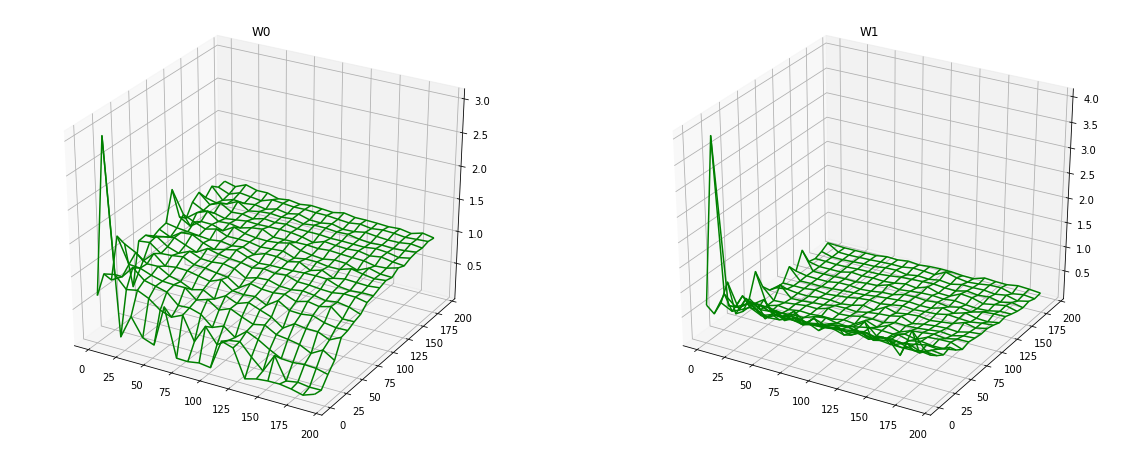

In [ ]:
# plotting
# x and y axis
x = np.arange(1, 201, 10)
y = np.arange(1, 201, 10)
  
X, Y = np.meshgrid(x, y)
Z_w0 = lossM_w0
Z_w1 = lossM_w1

 # plotting for w0 initialized

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2 ,1, projection='3d')
ax.plot_wireframe(X, Y, Z_w0, color ='green')
ax.set_title('W0');

# plotting for w1 initialized
ax = fig.add_subplot(1, 2 ,2, projection='3d')
ax.plot_wireframe(X, Y, Z_w1, color ='green')
ax.set_title('W1');